In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pickle

In [2]:
def labels(filename):
    with open(filename, 'rb') as f:
        labels = np.load(f).ravel()
    return labels

In [3]:
training_data_x = pickle.load(open("TS-Train.pkl", "rb")).dropna(axis=1)
test_x = pickle.load(open("TS-Test.pkl", "rb")).dropna(axis=1)

training_data_x = preprocessing.normalize(training_data_x,norm='max',axis=0) #without normalization acc=99%
test_x = preprocessing.normalize(test_x, norm='max',axis=0) #normalization "DOES NOT" affect decision trees BTW

training_data_y = labels("../Labels-Train.npy")
test_y = labels("../Labels-Test.npy")

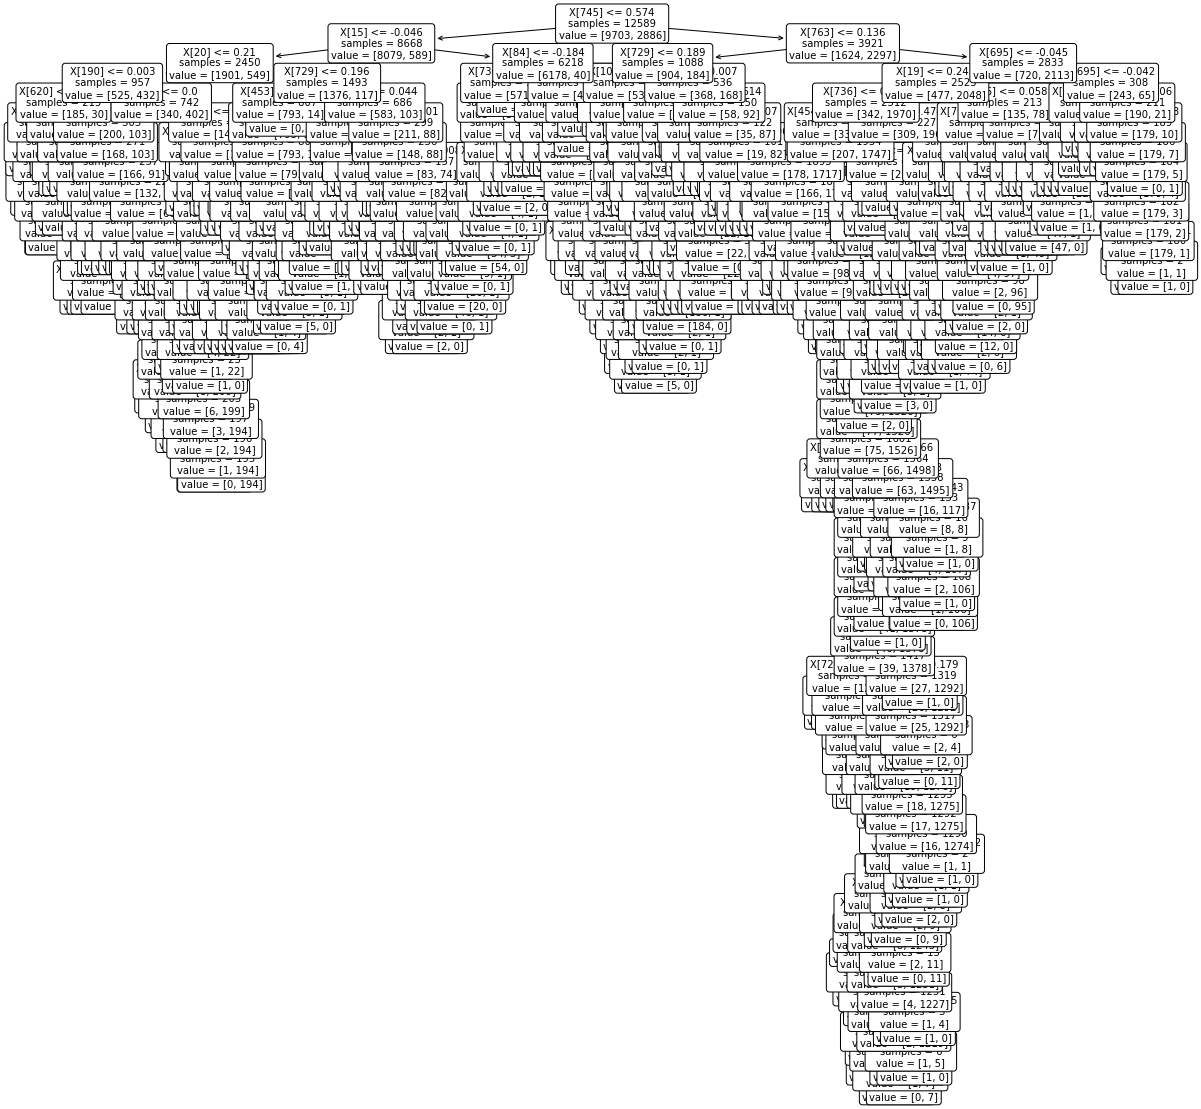

Accuracy percentage:  76.04828462515883 %


In [4]:
DTclassifier = DecisionTreeClassifier()
DTclassifier.fit(training_data_x, training_data_y)

plt.figure(figsize=(20,20))
tree.plot_tree(DTclassifier, fontsize=10, impurity=False, rounded=True)
plt.show()

y_pred = DTclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

0.6073105436573311
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1214
           1       0.47      0.33      0.38       360

    accuracy                           0.76      1574
   macro avg       0.64      0.61      0.62      1574
weighted avg       0.74      0.76      0.74      1574



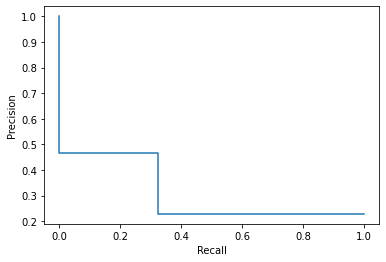

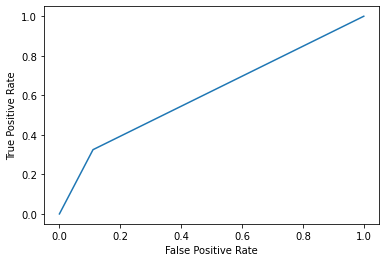

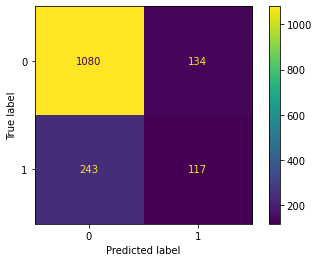

In [7]:
prec, recall, _ = metrics.precision_recall_curve(test_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(test_y, y_pred))

cm = metrics.confusion_matrix(test_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(test_y, y_pred))

In [8]:
with open('tf-models/decision-tree.pkl','wb') as f:
    pickle.dump(DTclassifier,f)

In [9]:
RFclassifier = RandomForestClassifier()
RFclassifier.fit(training_data_x, training_data_y)
y_pred = RFclassifier.predict(test_x)
print("Accuracy percentage: ", accuracy_score(test_y, y_pred)*100, "%")

Accuracy percentage:  78.20838627700127 %


0.5255651656598939
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      1214
           1       0.90      0.05      0.10       360

    accuracy                           0.78      1574
   macro avg       0.84      0.53      0.49      1574
weighted avg       0.81      0.78      0.70      1574



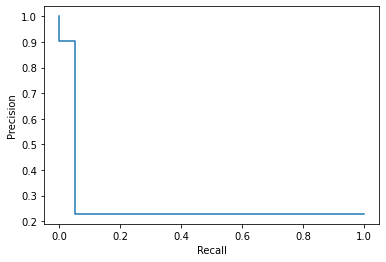

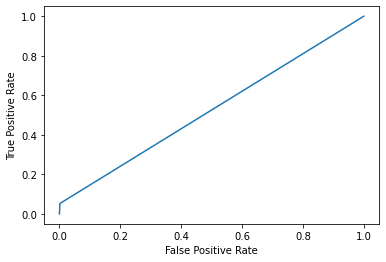

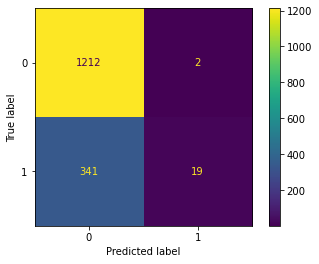

In [10]:
prec, recall, _ = metrics.precision_recall_curve(test_y, y_pred)
metrics.PrecisionRecallDisplay(precision=prec, recall=recall).plot()

fpr, tpr, _ = metrics.roc_curve(test_y, y_pred)
metrics.RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

print(metrics.roc_auc_score(test_y, y_pred))

cm = metrics.confusion_matrix(test_y, y_pred)
metrics.ConfusionMatrixDisplay(cm).plot()

print(metrics.classification_report(test_y, y_pred))

In [11]:
with open('tf-models/random-forest.pkl','wb') as f:
    pickle.dump(RFclassifier,f)